### IMAGE SEGMENTATION (CONTOURS)

In [10]:
import cv2
import numpy as np


img = cv2.imread("media/mountains.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, np.mean(gray)*1.5, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key=cv2.contourArea)[-1]

print(cnts)

mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
mask_new = cv2.drawContours(mask, [cnts], -1, (255,255,255), -1)

final_image = cv2.bitwise_and(img, img, mask=mask_new)

cv2.imshow("thresh", thresh)
cv2.imshow("gray", gray)
cv2.imshow("IMAGEN", img)
cv2.imshow("MASK", mask_new)
cv2.imshow("FINAL", final_image)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

[[[683   0]]

 [[682   1]]

 [[682   2]]

 ...

 [[  0 437]]

 [[779 437]]

 [[779   0]]]


### IMAGE SEGMENTATION (WATERSHED)

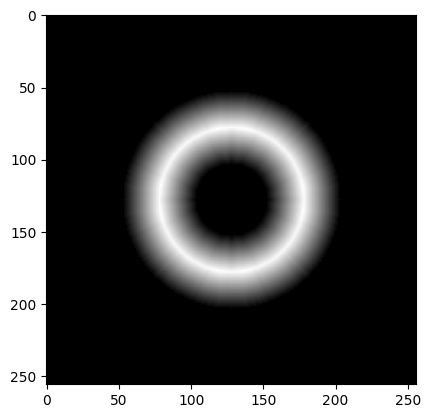

In [12]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('media/circle.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

dist_transform = cv2.distanceTransform(gray, cv2.DIST_L2, 5)

plt.imshow(dist_transform, cmap="gray")

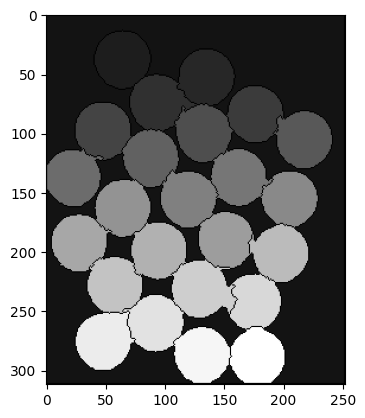

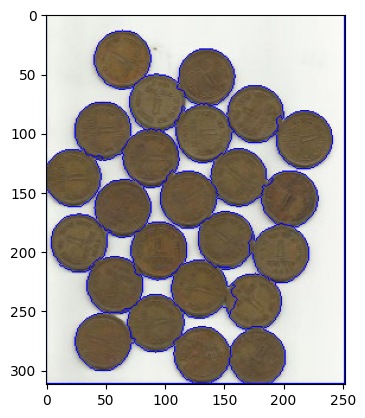

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
img = cv2.imread('media/mountains.jpg')
img = cv2.imread('media/coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)



# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers, cmap="gray")
plt.figure()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.imshow(dist_transform, cmap="gray")

### IMAGE SEGMENTATION WITH KMEANS

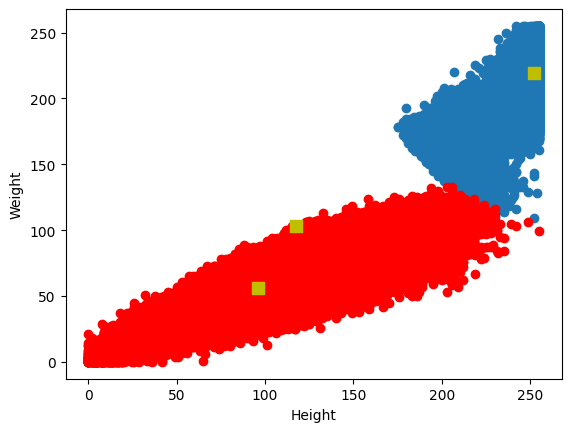

In [12]:
# https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("media/mountains.jpg")

cv2.imshow("IMG", img)

img2D = img.reshape((-1,3))
img2D = np.float32(img2D)
cv2.imshow("IMG", img2D)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

compactness, labels, centers = cv2.kmeans(img2D, 2, None, criteria, 10, flags)

A = img2D[labels.ravel()==0]
B = img2D[labels.ravel()==1]
# C = img2D[labels.ravel()==2]

plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
# plt.scatter(C[:,0],C[:,1], c="g")
plt.scatter(centers[:,0],centers[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("media/mountains.jpg")



img2D = img.reshape((-1,3))
img2D = np.float32(img2D)
# cv2.imshow("IMG", twoDim)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center = cv2.kmeans(img2D, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2.imshow("IMG", img)
cv2.imshow('res2',res2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### BACKGROUND IMAGE SUBSTRACTOR (MOG2)

In [1]:
import cv2
import numpy as np

cap = cv2.VideoCapture("media/Conveyor Belt Inclined.mp4")

fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()

    if not ret:
        break

    fgmask = fgbg.apply(frame)

    cv2.imshow("Frame", frame)
    cv2.imshow("FG", fgmask)

    k = cv2.waitKey(1)

    if k == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()